<a href="https://colab.research.google.com/github/kyuna921/ek381/blob/main/ek381lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EK381 Exploratory Data Analysis <br> Lab 2: Histograms

### This lab was completed by [Kyuna Park].

Before we get to our dataset, we always need to load the necessary libraries with the "import" command. You'll also  notice that libraries are often imported using an abbreviated name via the "as" command. You can use any shorthand you prefer, but the assignments will stick to commonly-accepted abbreviations.

In [5]:
#Numpy is a package for working with arrays, linear algebra, etc. and stands for "numerical Python".
import numpy as np
#Pandas is a package for working with data frames.
import pandas as pd
#Matplotlib is a plotting library that mimics Matlab conventions.
import matplotlib.pyplot as plt
#Seaborn is a data visualization package.
import seaborn as sns

In the last lab, we used a pandas dataframe to generate statistics and plots for the penguins dataset. In this lab, we will start by building a dataframe from scratch, so we can have a better wunderstanding going forward. The commands below create a simple dataframe with fictional data on whether a given day is sunny or rainy as well as whether the BU bridge has traffic or not.

In [6]:
weatherdf = pd.DataFrame(
    {"Weather": ["sunny", "rainy", "rainy", "sunny", "sunny", "rainy", "sunny", "sunny","rainy"],
     "Bridge Traffic": ["no", "no", "yes", "no", "no", "yes", "no", "yes","yes"]})
weatherdf

,Weather,Bridge Traffic
0,sunny,no
1,rainy,no
2,rainy,yes
3,sunny,no
4,sunny,no
5,rainy,yes
6,sunny,no
7,sunny,yes
8,rainy,yes


How many days are sunny *and* have bridge traffic? This is easy to compute with the `count_values()` command.

In [7]:
weatherdf.value_counts()

Weather  Bridge Traffic
sunny    no                4
rainy    yes               3
         no                1
sunny    yes               1
Name: count, dtype: int64

We can read off the number of occurrences for each possible intersection of events. For instance, 4 days are sunny *and* have no bridge traffic. If we collect a sufficient amount of data, it is often reasonable to use the normalized counts as estimates of the "true" probabilities. We can do this by setting `normalize = True` in the `count_values()` command.

In [8]:
weatherdf.value_counts(normalize=True)

Weather  Bridge Traffic
sunny    no                0.444444
rainy    yes               0.333333
         no                0.111111
sunny    yes               0.111111
Name: proportion, dtype: float64

In our mathematical language, let $A = \{\text{sunny}\}$ and $B = \{\text{yes traffic}\}$. Then, our estimates of the probabilities are $$\hat{\mathbb{P}}[A \cap B] = 1/9,~~\hat{\mathbb{P}}[A^c \cap B] = 3/9, ~~\hat{\mathbb{P}}[A \cap B^c] = 4/9,~~\hat{\mathbb{P}}[A^c \cap B^c] = 1/9 \ .$$ (I used the "hat" symbol on top of $\mathbb{P}$ to remind us these are just estimates, and we might get better estimates of the true values with more data.) Now, let's try to visualize this distribution with a bar chart. In pandas, we can usually just add `.plot()` to our command to get a plot.

<Axes: xlabel='Weather,Bridge Traffic', ylabel='Probability'>

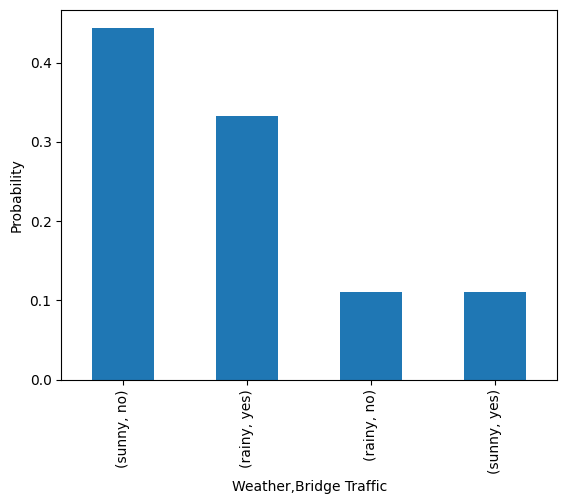

In [9]:
weatherdf.value_counts(normalize=True).plot(kind="bar",ylabel = "Probability")

What if we only want to work with one variable at a time? We can extract a single column from the data frame, either referring to it by its index or by its exact name. An example of each is worked out below for extracting the "Bridge Traffic" column.

**Index:** We can use the `iloc` (index location) command, putting `:` first to indicate "all of the rows" and `1` next to indicate "the second column" since Python starts with index 0.

**Column Name:** We can just put the exact name in quotes (including correct capitalization).

In [10]:
weatherdf.iloc[:,1]

,Bridge Traffic
0,no
1,no
2,yes
3,no
4,no
5,yes
6,no
7,yes
8,yes


In [11]:
weatherdf["Bridge Traffic"]

,Bridge Traffic
0,no
1,no
2,yes
3,no
4,no
5,yes
6,no
7,yes
8,yes


We can use the commands above to count the values, normalize these counts, and plot the resulting distribution.

In [12]:
weatherdf["Bridge Traffic"].value_counts(normalize = True)

,proportion
Bridge Traffic,
no,0.555556
yes,0.444444


<Axes: xlabel='Bridge Traffic', ylabel='Probability'>

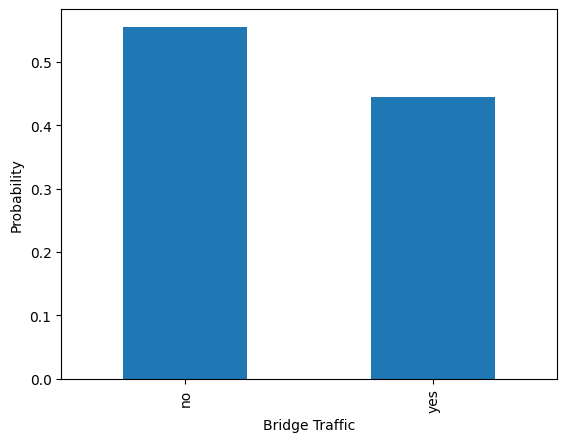

In [ ]:
weatherdf["Bridge Traffic"].value_counts(normalize = True).plot(kind = "bar", ylabel = "Probability")

What if we want to estimate and visualize the conditional probabilities? For instance, given that it is sunny, what is the probability there is traffic? (Above, we calculated the probability that it is sunny *and* there is traffic.) The `pd.crosstab()` command will give us a table of the conditional counts (i.e., a contingency table), and takes as inputs the two columns we would like to compare.

In [13]:
pd.crosstab(weatherdf["Bridge Traffic"], weatherdf["Weather"])

Weather,rainy,sunny
Bridge Traffic,,
no,1,4
yes,3,1


We can normalize this by either columns or rows (this is called "index" for crosstab). Below, we've normalized by columns.

In [14]:
pd.crosstab(weatherdf["Bridge Traffic"], weatherdf["Weather"],normalize = "columns")

Weather,rainy,sunny
Bridge Traffic,,
no,0.25,0.8
yes,0.75,0.2


Again, let $A = \{\text{sunny}\}$ and $B = \{\text{yes traffic}\}$. Then, we can think of these values as estimates of the conditional probabilities: $$\hat{\mathbb{P}}[B | A] = 0.2,~~\hat{\mathbb{P}}[B^c | A] = 0.8,~~\hat{\mathbb{P}}[B | A^c] = 0.75,~~\hat{\mathbb{P}}[B^c | A^c] = 0.25 \ .$$   

If we ask pandas to plot this table, we get a grouped bar chart which is a convenient visualization for conditional probabilities.

<Axes: xlabel='Bridge Traffic', ylabel='Probability'>

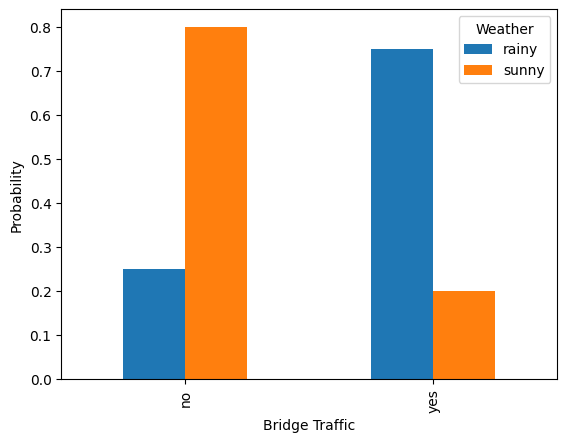

In [15]:
pd.crosstab(weatherdf["Bridge Traffic"], weatherdf["Weather"],normalize = "columns").plot(kind = "bar", ylabel = "Probability")

Throughout the course, we will try to highlight common fallacies that you should try to avoid when applying statistics and analyzing datasets. For a nice visualization of some of the topics we will cover, visit [this link](https://www.geckoboard.com/uploads/data-fallacies-to-avoid.pdf). In this lab, we will focus on [**Simpson's paradox**](https://en.wikipedia.org/wiki/Simpson\%27s_paradox) in which a trend appears across subsets (or groupings) of the data, but then reverses or disappears when we merge the groups. Below, you can see a famous example for kidney stone treatments from *Charig, Clive R., et al. "Comparison of treatment of renal calculi by open surgery, percutaneous nephrolithotomy, and extracorporeal shockwave lithotripsy." Br Med J (Clin Res Ed) 292.6524 (1986): 879-882.*


|Kidney Stone Size | Treatment A | Treatment B |
 --- | --- | --- |
|**Small** | 81 successes out of 87 total (**93\%**) | 234 successes out of 270 total  (87\%)|
| **Large** | 192 successes out of 263 total (**73\%**)| 55 successes out of 80 total (67\%)|
| **Small or Large** | 273 successes out of 350 total (78\%) | 289 successes out of 350 total (**83\%**) |
---

You'll notice that, although Treatment A is more effective for the groups individually, when we combine the data, we get the curious result that Treatment B has a higher success rate overall. In this particular example, this can be understood as follows:
1. Small kidney stones are easier to treat overall.
2. It happened that the Treatment B study included many patients with small kidney stones (270) compared to those with large stones (80), whereas the Treatment A study included many patients with large kidney stones (263) compared to those with small stones (87). Thus, we should expect better outcomes in the Treatment B study since it had an easier population.
3. If we condition on the stone size (sometimes known as the "confounding variable"), we can more clearly see the effectiveness of the treatment.
Overall, the possible fallacy here is that we implicitly assume that each treatment was applied to an equal proportion of small and large stone patients, which is definitely not the case.

Now, let's import our dataset. Following the same method you got successfully working in Lab 1, read in the "entrancesurvey.csv" file as a dataframe called `surveydata`. Recall that CSV (comma-separated values) format is a standard format for tabular data, and can contain both descriptive strings as well as numerical values. CSV files are simple and easy to read/edit directly. You should try opening one with another program, such as a basic text editor or a spreadsheet editor.

In [16]:
#Google colab users, delete the # symbols from the two lines below and then run this cell to mount your Google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
surveydata = pd.read_csv("drive/MyDrive/EK381/entrancesurvey.csv") #Put the path to entrancesurvey.csv inside the quotes.

How many rows and columns does the dataframe have?

In [18]:
surveydata.shape

(215, 17)

Next, let's take a quick look at the dataframe. Notice that it indexes the first row with 0, not 1.

In [19]:
#If you want to see the whole dataframe throughout this lab,
#rather than just the first and last 5 rows, uncomment the line immediately below.
#pd.set_option("display.max_rows", None)
surveydata

,Timestamp,"What is your major? (Double majors please pick your ""primary"" major.)",Which of the following do you prefer?,Have you taken a probability and statistics course before?,Which of the following best describes your current feeling about EK381?,What is your preferred caffeine source?,At what age did you get your first smartphone?,"How many countries have you visited? (Please provide your answer as a number, not a list of countries.)","Rate the following movies. (A bit of a random mix, but hopefully you've heard of most of them.) [Loved it! ]","Rate the following movies. (A bit of a random mix, but hopefully you've heard of most of them.) [Liked it.]","Rate the following movies. (A bit of a random mix, but hopefully you've heard of most of them.) [Just OK.]","Rate the following movies. (A bit of a random mix, but hopefully you've heard of most of them.) [Didn't like it.]","Rate the following movies. (A bit of a random mix, but hopefully you've heard of most of them.) [Hated it!]","Rate the following movies. (A bit of a random mix, but hopefully you've heard of most of them.) [Never seen it.]",Optional: What was an aspect of a previous course that really helped you succeed?,How would you rate your understanding of Python programming?,Optional: Any suggestions for how we can make this a good semester?
0,8/31/2024 21:00:26,EE,Pen-and-paper math,Yes,Excited to learn foundational probability/stat...,Coffee,18+,25,Avengers: Endgame,"Barbie, Die Hard","Deadpool and Wolverine, Dune, Encanto, Inside ...","Booksmart, Everything Everywhere All at Once, ...",Oppenheimer,"Knives Out, Lady Bird, Mad Max: Fury Road, Poo...",NaN,NaN,NaN
1,9/1/2024 12:26:52,EE,Writing reports and making presentations,No,Just want to get through the semester.,Energy Drink,10,4,"Barbie, Dune, Encanto, Everything Everywhere A...",NaN,NaN,"Get Out, Back to the Future, Knives Out, Lady ...","Avengers: Endgame, Die Hard, Oppenheimer, Poor...","Booksmart, Deadpool and Wolverine, Interstellar",NaN,I have never used Python.,NaN
2,9/1/2024 12:27:42,ME,Programming algorithms,No,Excited to learn foundational probability/stat...,Tea,13,7,"Interstellar, Spider-Man: Into the Spiderverse...","Deadpool and Wolverine, Jurassic Park",The Matrix,Oppenheimer,NaN,"Avengers: Endgame, Barbie, Booksmart, Die Hard...",NaN,Beginner,NaN
3,9/1/2024 12:28:20,BME,Pen-and-paper math,No,Excited to learn about machine learning and da...,Tea,16,4,NaN,Knives Out,Inside Out 2,NaN,NaN,"Avengers: Endgame, Barbie, Booksmart, Deadpool...",NaN,Beginner,NaN
4,9/1/2024 12:28:58,ME,Pen-and-paper math,No,Hoping to get a good grade.,I don't drink caffeinated drinks.,12,14,"Booksmart, Die Hard, Get Out, Back to the Futu...","Avengers: Endgame, Jurassic Park","Barbie, Encanto, Everything Everywhere All at ...","Dune, Interstellar",Deadpool and Wolverine,"Lady Bird, Mad Max: Fury Road, Poor Things, To...",NaN,Expert,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,9/5/2024 11:08:16,ME,Pen-and-paper math,No,Excited to learn foundational probability/stat...,I don't drink caffeinated drinks.,13,2,NaN,"Avengers: Endgame, Dune",NaN,NaN,NaN,"Barbie, Booksmart, Deadpool and Wolverine, Die...",NaN,Beginner,NaN
211,9/5/2024 14:35:01,EE,Programming algorithms,No,Hoping to get a good grade.,Tea,14,15,"Deadpool and Wolverine, Interstellar, Oppenhei...","Avengers: Endgame, Jurassic Park, Spider-Man: ...",NaN,NaN,NaN,"Barbie, Booksmart, Die Hard, Dune, Encanto, Ev...",It was very easy,Competent,NaN
212,9/6/2024 7:36:16,BME,"Collecting data (in a ""wet lab"" or other setting)",Yes,Hoping to get a good grade.,I don't drink caffeinated drinks.,13,2,NaN,Barbie,NaN,NaN,NaN,"Avengers: Endgame, Booksmart, Deadpool and Wol...",recorded lectures,Beginner,NaN
213,9/6/2024 15:20:20,BME,"Collecting data (in a ""wet lab"" or other setting)",No,Hoping to get a good grade.,Coffee,11,15,"Avengers: Endgame, Barbie, Encanto",Die Hard,Dune,NaN,NaN,"Booksmart, Deadpool and Wolverine, Everything ...",NaN,

We will limit ourselves to the first five columns in this lab. One way to access these columns is with the `iloc[:,1:6]` command where `iloc` refers to "index location", putting first `:` refers to "all of the rows, and putting `1:6` next refers to columns 1 through 5. (Python indexing is funny like this, ending right before the last element of a requested interval.) **We will set this equal to a new dataframe called `df` that you should use below.** Note that changes to `df` will not impact the original dataframe `surveydata`.

In [20]:
df = surveydata.iloc[:,1:6]
df

,"What is your major? (Double majors please pick your ""primary"" major.)",Which of the following do you prefer?,Have you taken a probability and statistics course before?,Which of the following best describes your current feeling about EK381?,What is your preferred caffeine source?
0,EE,Pen-and-paper math,Yes,Excited to learn foundational probability/stat...,Coffee
1,EE,Writing reports and making presentations,No,Just want to get through the semester.,Energy Drink
2,ME,Programming algorithms,No,Excited to learn foundational probability/stat...,Tea
3,BME,Pen-and-paper math,No,Excited to learn about machine learning and da...,Tea
4,ME,Pen-and-paper math,No,Hoping to get a good grade.,I don't drink caffeinated drinks.
...,...,...,...,...,...
210,ME,Pen-and-paper math,No,Excited to learn foundational probability/stat...,I don't drink caffeinated drinks.
211,EE,Programming algorithms,No,Hoping to get a good grade.,Tea
212,BME,"Collecting data (in a ""wet lab"" or other setting)",Yes,Hoping to get a good grade.,I don't drink caffeinated drinks.
213,BME,"Collecting data (in a ""wet lab"" or other setting)",No,Hoping to get a good grade.,Coffee


---
#### <span style="color:blue">L2.1 How many BME majors responded to the survey?</span>
---
(You should use the `value_counts()` command applied to the first column.)
Recall, from Lab 1, that you can write comments directly in the Jupyter notebook using "Markdown" cells, like the one below. (You change the cell type from Code to Markdown and back using the menu or keyboard shortcuts.) Running a Markdown cell will display the text.

In [21]:
#Use this cell for your computations.
surveydata.iloc[:,1].value_counts()

,count
"What is your major? (Double majors please pick your ""primary"" major.)",
BME,96
ME,54
CE,46
EE,19


#### The number of BME respondents was [96].

---



---
#### <span style="color:blue">L2.2 What is the probability that a random survey respondent is a BME major?</span>
---

Use the normalized count to get this value. (We could also treat this as an estimate of the true distribution of majors in EK381, which is not captured by this survey since only 215 out of 270 total students responded.)

In [22]:
#Use this cell for your computations.
surveydata.iloc[:,1].value_counts(normalize = True)

,proportion
"What is your major? (Double majors please pick your ""primary"" major.)",
BME,0.446512
ME,0.251163
CE,0.213953
EE,0.088372


#### The probability that a respondent is a BME major is [0.446512].

---
#### <span style="color:blue">L2.3 Create a histogram representing the probability a respondent has a certain major.</span>
---
See above for an example.

<Axes: xlabel='What is your major? (Double majors please pick your "primary" major.)', ylabel='Probability'>

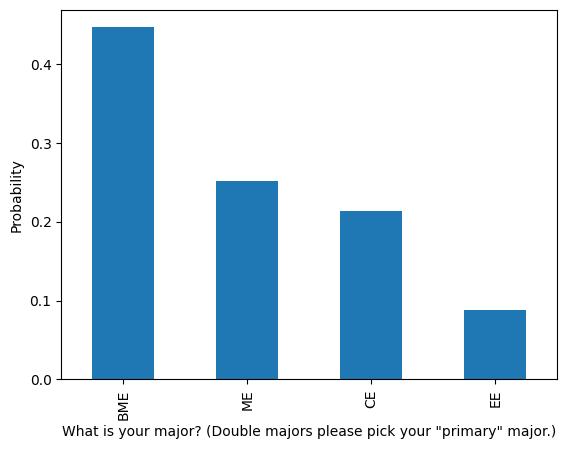

In [23]:
#Use this cell to generate your plot.

surveydata.iloc[:,1].value_counts(normalize = True).plot(kind="bar",ylabel="Probability")

Pandas also lets refer to columns by their names, rather than just their indices. One issue in our dataset is that the column name is the entire survey question. Let's go ahead and rename columns with simpler titles, and display the data frame again to see that it worked.

In [24]:
df.columns = ["Major","Preferred Activity", "Previous Course", "Current Feeling", "Caffeine Source"]
df

,Major,Preferred Activity,Previous Course,Current Feeling,Caffeine Source
0,EE,Pen-and-paper math,Yes,Excited to learn foundational probability/stat...,Coffee
1,EE,Writing reports and making presentations,No,Just want to get through the semester.,Energy Drink
2,ME,Programming algorithms,No,Excited to learn foundational probability/stat...,Tea
3,BME,Pen-and-paper math,No,Excited to learn about machine learning and da...,Tea
4,ME,Pen-and-paper math,No,Hoping to get a good grade.,I don't drink caffeinated drinks.
...,...,...,...,...,...
210,ME,Pen-and-paper math,No,Excited to learn foundational probability/stat...,I don't drink caffeinated drinks.
211,EE,Programming algorithms,No,Hoping to get a good grade.,Tea
212,BME,"Collecting data (in a ""wet lab"" or other setting)",Yes,Hoping to get a good grade.,I don't drink caffeinated drinks.
213,BME,"Collecting data (in a ""wet lab"" or other setting)",No,Hoping to get a good grade.,Coffee


Note that you can now call the column by `df["Major"]`, which is more readable than `df.iloc[:,0]`. (Note calling columns by their name is sensitive to capitalization.)

In [25]:
df["Major"]

,Major
0,EE
1,EE
2,ME
3,BME
4,ME
...,...
210,ME
211,EE
212,BME
213,BME


We can make our dataframe a bit more readable by paraphrasing some of the possible answers. For example, it will be more readable to change "Pen-and-paper math" to "math". We can do this with the `replace` command, as shown below.

In [26]:
df.replace("Pen-and-paper math", "math", inplace = True)
df.replace("Writing reports and making presentations", "writing", inplace = True)
df.replace("Programming algorithms", "coding", inplace = True)
df.replace("Collecting data (in a \"wet lab\" or other setting)", "data collection", inplace = True)
df.replace("Just want to get through the semester.", "just get by", inplace = True)
df.replace("Hoping to get a good grade.", "want a good grade", inplace = True)
df.replace("Excited to learn foundational probability/statistics concepts.", "excited about probability", inplace = True)
df.replace("Excited to learn about machine learning and data analysis.", "excited about ML/data", inplace = True)
df

,Major,Preferred Activity,Previous Course,Current Feeling,Caffeine Source
0,EE,math,Yes,excited about probability,Coffee
1,EE,writing,No,just get by,Energy Drink
2,ME,coding,No,excited about probability,Tea
3,BME,math,No,excited about ML/data,Tea
4,ME,math,No,want a good grade,I don't drink caffeinated drinks.
...,...,...,...,...,...
210,ME,math,No,excited about probability,I don't drink caffeinated drinks.
211,EE,coding,No,want a good grade,Tea
212,BME,data collection,Yes,want a good grade,I don't drink caffeinated drinks.
213,BME,data collection,No,want a good grade,Coffee


---
#### <span style="color:blue">L2.4 How many respondents are both CE majors and prefer coding? </span>
---
Recall that you can use `value_counts()` on two (or more) columns at once. You can select multiple columns by their indices with `iloc` or by their column names with `loc`. For example, `df.iloc[:,[2,3]]` refers to the 2nd and 3rd columns and `df.loc[:,"Previous Course","Current Feeling"]` has the same effect. Note that the initial colon `:` means "all of the rows."

In [27]:
#Use this cell for your computations.
df.iloc[:,[0,1]].value_counts()

Major  Preferred Activity
BME    math                  45
ME     math                  38
BME    data collection       35
CE     coding                24
       math                  15
EE     math                  14
BME    coding                13
ME     coding                 7
       writing                5
CE     data collection        4
ME     data collection        4
BME    writing                3
CE     writing                3
EE     writing                3
       coding                 2
Name: count, dtype: int64

#### The number of respondents who are both CE majors and prefer coding is [24].

We could make a histogram of all these configurations, but it is difficult to get insight, especially since the x-axis is not sorted in a useful way. (Feel free to try this by adding `.plot(kind = "bar")` after your `value_counts()` command.)
Instead, it is more useful to try to inspect this data using crosstabs and conditional probability, as we did above.

---
#### <span style="color:blue">L2.5 Generate a "crosstab" table with "Preferred Activity" along the rows and "Major" along the columns, normalized by columns. </span>
---

In [28]:
#Use this cell to generate your crosstab.
pd.crosstab(df["Major"],df["Preferred Activity"],normalize="columns")

Preferred Activity,coding,data collection,math,writing
Major,,,,
BME,0.282609,0.813953,0.401786,0.214286
CE,0.521739,0.093023,0.133929,0.214286
EE,0.043478,0.000000,0.125000,0.214286
ME,0.152174,0.093023,0.339286,0.357143


---
#### <span style="color:blue">L2.6 Create a histogram for this crosstab. Comment below on whether any specific majors strongly prefer certain activities, compared to other majors.  </span>
---

<Axes: xlabel='Major', ylabel='Preference'>

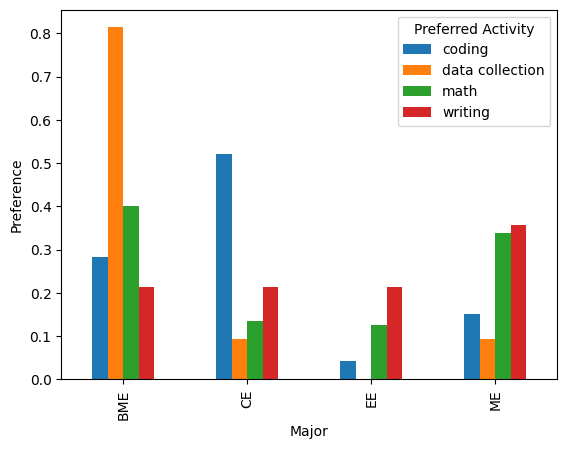

In [29]:
#Use this cell to generate your histogram.
pd.crosstab(df["Major"],df["Preferred Activity"],normalize="columns").plot(kind="bar",ylabel="Preference")

#### Comments for L2.6: BME strongly prefers data collection. and CE for coding

---
#### <span style="color:blue">L2.7 Create a histogram for a crosstab consisting of a different pair of columns (one could be the same). Comment below on anything interesting in your plot (even if your comment is that conditioning has no significant effect).  </span>
---

#### Comments for 2.7:

Finally, let's preview some of the functionality of pandas for generating estimates of probability mass functions (PMFs). We can use the "At what age did you get your first smartphone?" question since the answers are integer-valued. There are two data cleaning issues to solve before we begin, and I've done these below.
1. The survey includes "18+" as a possible answer. Even though this is not quite accurate, let's just replace this with "18" so that we are only dealing with integers. (If we were trying to publish this data, we would at the very least need to make a clear note about this.)
2. The age values in the CSV are actually strings, not integers, which will make them hard to sort. Let's convert them to integers.
With these handled, I can apply our standard method to get a normalized histogram.

<Axes: title={'center': 'Age of Respondent at First Smartphone'}, xlabel='Age in Years', ylabel='Probability'>

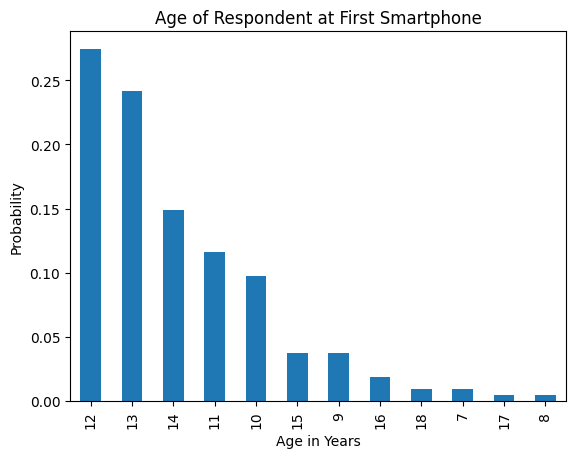

In [30]:
smartphone = surveydata.iloc[:,6]
smartphone.replace("18+","18",inplace=True)
smartphone = pd.to_numeric(smartphone)
#Note below I can encapsulate my command in parentheses to break it up over multiple lines.
(smartphone
 .value_counts(normalize = True)
 .plot(kind="bar",xlabel = "Age in Years", ylabel = "Probability", title = "Age of Respondent at First Smartphone")
)

Notice that the plot is sorted by descending probability values, rather than by the x-axis, which is what we would find more intuitive and readable. To fix this, I can just apply `sort_index()` right after `value_counts()`.

<Axes: title={'center': 'Age of Respondent at First Smartphone'}, xlabel='Age in Years', ylabel='Probability'>

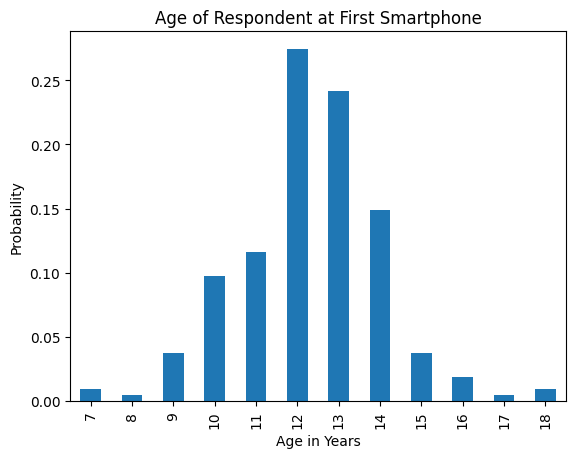

In [31]:
(smartphone
 .value_counts(normalize = True)
 .sort_index()
 .plot(kind="bar",xlabel = "Age in Years", ylabel = "Probability", title = "Age of Respondent at First Smartphone")
)

---
#### <span style="color:blue">L2.8 Below, in your own words, provide a rough description of this distribution. Where is it centered? Is it roughly symmetric? </span>
---

#### Comments on 2.8:

Finally, let's get an estimate of the cumulative distribution function. As an example, say I create a simple probability mass function (PMF)   

In [32]:
pmftest = pd.Series([0.3, 0.2, 0.4, 0.1])
pmftest

,0
0,0.3
1,0.2
2,0.4
3,0.1


How do I find the sum of the probability for a given value *and* all preceding values? I can simply use the `cumsum()` command, as shown below. For example, note that 0.3 + 0.2 = 0.5, and 0.3 + 0.2 + 0.4 = 0.9.

In [33]:
pmftest.cumsum()

,0
0,0.3
1,0.5
2,0.9
3,1.0


---
#### <span style="color:blue">L2.9 Estimate the probability that an EK381 student got their first smartphone at age 12 or less. </span>
---
Hint: Start by counting the values (with normalization on), and then sorting them. (This is done above as part of the histogram generation.) Now, use the cumulative sum.

In [34]:
#Use this cell to generate your cumulative distribution.

smartphone.value_counts(normalize=True).sort_index().cumsum()


,proportion
At what age did you get your first smartphone?,
7,0.009302
8,0.013953
9,0.051163
10,0.148837
11,0.265116
12,0.539535
13,0.781395
14,0.930233
15,0.967442


#### The estimated probability that an EK381 got their first smartphone at age 12 or less is [0.539535].